<a href="https://colab.research.google.com/github/RubenMcCarty/Master-BigData-DataScience/blob/main/Part2_02MBID_Gestion_datos_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

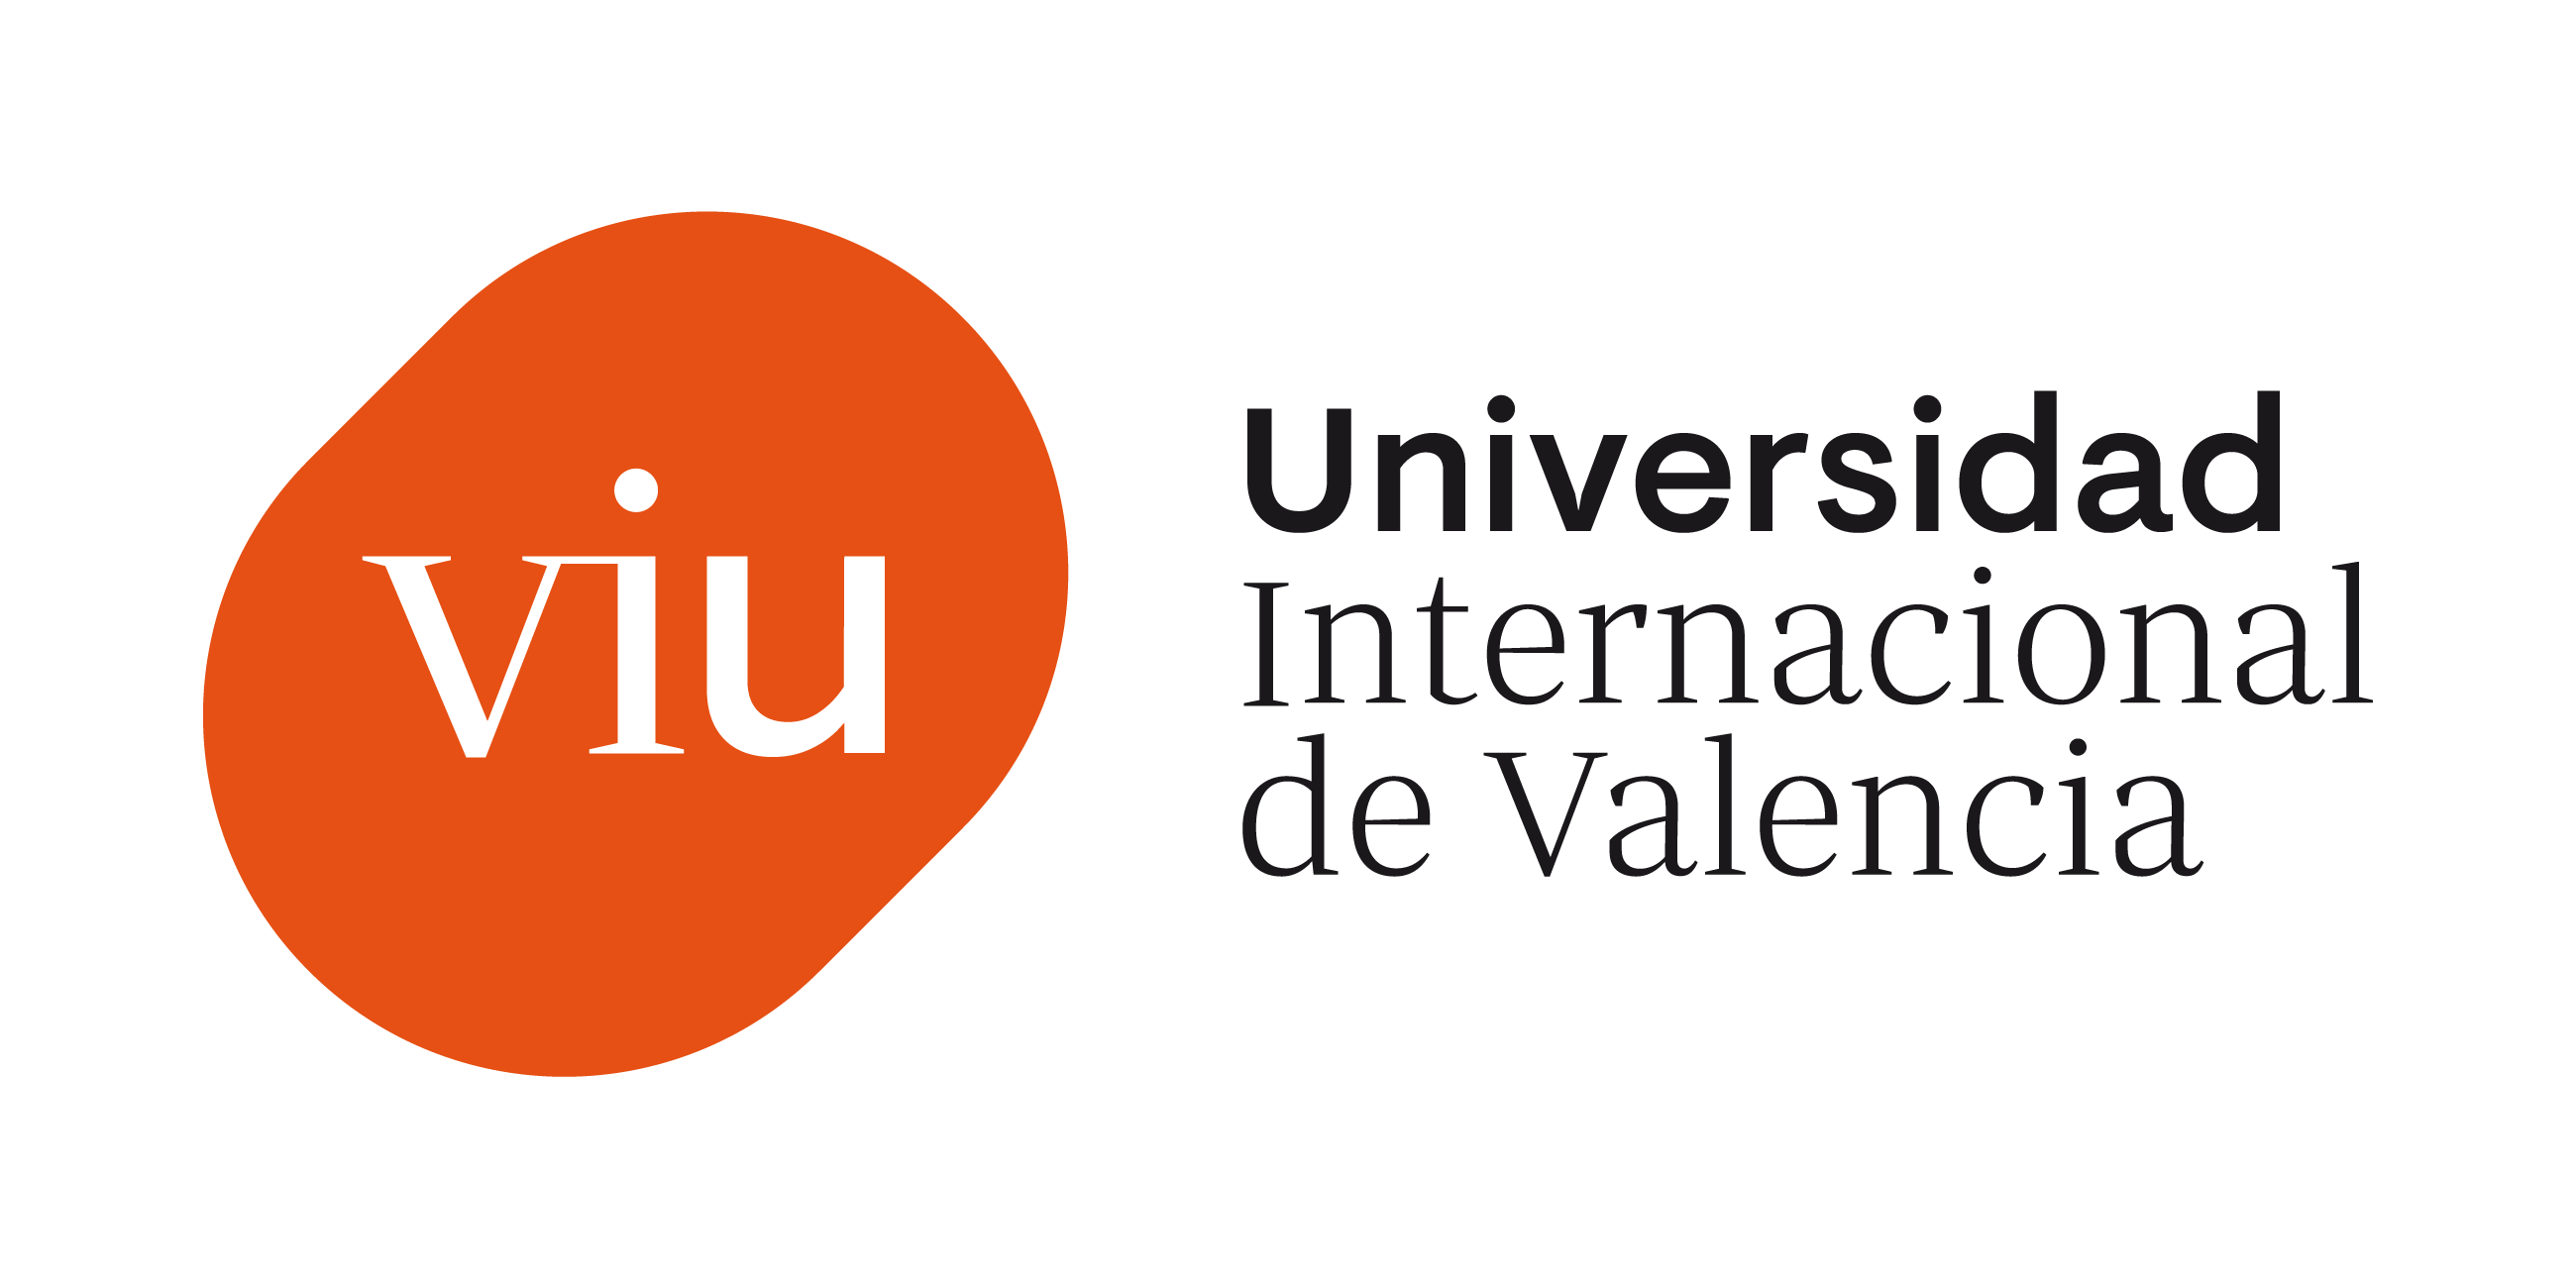

# Actividad 2: Puesta en marcha de BBDD Cassandra y gestión de datos básica en Python
# [Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

# **Parte 2: Programa Python de gestión de datos (65%)**

# Clases por entidad o relación (10%):

# Conexión a Cassandra desde Visual Studio Code:

Instalamos la extensión "CQL Language Support" en Visual Studio Code.

Esto nos ayudará a tener una mejor experiencia de codificación con archivos CQL.


Conecta a tu base de datos Cassandra desde Python:

Para conectarte a Cassandra desde Visual Studio Code, necesitamos el controlador de Python de Cassandra llamado cassandra-driver. Asegúrate de tenerlo instalado ejecutando el siguiente comando:

In [2]:
!pip install cassandra-driver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 76.3 MB/s eta 0:00:00


Una vez instalada la biblioteca, se puede crear una conexión a Cassandra de la siguiente manera:

In [3]:
from cassandra.cluster import Cluster

cluster = Cluster()
session = cluster.connect()


Traceback (most recent call last):
  File "cassandra/cluster.py", line 3541, in cassandra.cluster.ControlConnection._reconnect_internal
  File "cassandra/cluster.py", line 3563, in cassandra.cluster.ControlConnection._try_connect
  File "cassandra/cluster.py", line 1630, in cassandra.cluster.Cluster.connection_factory
  File "cassandra/connection.py", line 850, in cassandra.connection.Connection.factory
  File "/usr/local/lib/python3.10/dist-packages/cassandra/io/asyncorereactor.py", line 347, in __init__
    self._connect_socket()
  File "cassandra/connection.py", line 917, in cassandra.connection.Connection._connect_socket
ConnectionRefusedError: [Errno 111] Tried connecting to [('127.0.0.1', 9042)]. Last error: Connection refused
ERROR:cassandra.cluster:Control connection failed to connect, shutting down Cluster:
Traceback (most recent call last):
  File "cassandra/cluster.py", line 1700, in cassandra.cluster.Cluster.connect
  File "cassandra/cluster.py", line 3507, in cassandra.clu

NoHostAvailable: ignored


Esta conexión se puede utilizar para ejecutar consultas a Cassandra. Por ejemplo, la siguiente consulta recupera todas las películas de la tabla Pelicula_Categoria:

In [ ]:
session.execute("SELECT * FROM rubenquispe.pelicula_categoria")


Para conectarse a Cassandra desde Astra Datastax, se debe especificar las credenciales de la siguiente manera:

In [ ]:
cluster = Cluster(
    cloud="astra",
    keyspace="rubenquispe",
    username="<usuario>",
    password="<contraseña>",
)
session = cluster.connect()


Para usar el controlador, debemos importar el módulo cassandra.cluster y crear una instancia de la clase Cluster, pasando los parámetros de conexión que necesites. Por ejemplo, si quieres conectarte a Astra, debes proporcionar el secure connect bundle, el username y el password. Podemos obtener estos datos desde el portal de Astra, en la sección Connect de tu base de datos. Por ejemplo:

In [1]:
from cassandra.cluster import Cluster

cloud_config = {
    'secure_connect_bundle': 'path/to/secure-connect-database_name.zip'
}
auth_provider = PlainTextAuthProvider('username', 'password')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()


ModuleNotFoundError: ignored

Para consultar los datos de la tabla, puedes usar el método fetchall. Por ejemplo, para obtener todas las películas de la categoría comedia, puedes hacer lo siguiente:

In [ ]:
result = session.execute("SELECT * FROM Pelicula WHERE categoria = 'comedia'").fetchall()
for row in result:
    print(row.id, row.nombre, row.actores, row.fecha_estreno, row.duracion)


Una vez creada la conexión, se puede ejecutar consultas a Cassandra de la misma manera que se indicó anteriormente.

Clases por entidad o relación

Para crear clases por entidad o relación en Python, se puede utilizar la siguiente sintaxis:

In [ ]:
class Pelicula:
    def __init__(self, nombre, categoria, actores, fecha_estreno, duracion):
        self.nombre = nombre
        self.categoria = categoria
        self.actores = actores
        self.fecha_estreno = fecha_estreno
        self.duracion = duracion

class Cine:
    def __init__(self, nombre, id, capacidad):
        self.nombre = nombre
        self.id = id
        self.capacidad = capacidad


Estas clases se pueden utilizar para guardar la información de las tablas de Cassandra. Por ejemplo, la siguiente función recupera una película de la tabla Pelicula_Categoria y la devuelve como una instancia de la clase Pelicula:

In [ ]:
def get_pelicula(nombre):
    query = "SELECT * FROM rubenquispe.pelicula_categoria WHERE pelicula_nombre = ?"
    result = session.execute(query, [nombre])
    pelicula = Pelicula(*result[0])
    return pelicula

Estas tablas se pueden consultar de la siguiente manera:

In [ ]:
def get_cine_por_nombre(nombre):
    query = "SELECT * FROM rubenquispe.soporte_cine WHERE cine_nombre = ?"
    result = session.execute(query, [nombre])
    cine = Cine(*result[0])
    return cine

def get_pelicula_por_nombre(nombre):
    query = "SELECT * FROM rubenquispe.soporte_pelicula WHERE pelicula_nombre = ?"
    result = session.execute(query, [nombre])
    pelicula = Pelicula(*result[0])
    return pelicula


Estas funciones se pueden utilizar para obtener información de las entidades Cine y Película sin tener que escanear las tablas principales. Por ejemplo, la siguiente consulta recupera el cine con el nombre "Cine A":

In [ ]:
cine = get_cine_por_nombre("Cine A")

Para crear clases de Python que representen las entidades o relaciones del modelo de datos, podemos usar el módulo cassandra.cqlengine.models, que te permite definir modelos basados en la clase Model. Esta clase te permite definir los atributos de la entidad usando columnas de diferentes tipos, y también te permite sincronizar el modelo con la base de datos usando el método sync_table. Por ejemplo, para crear una clase que represente la entidad Pelicula, podemos hacer lo siguiente:

In [ ]:
from cassandra.cqlengine import columns
from cassandra.cqlengine.models import Model

class Pelicula(Model):
    id = columns.Integer(primary_key=True)
    nombre = columns.Text()
    categoria = columns.Text()
    actores = columns.Set(columns.Text())
    fecha_estreno = columns.Date()
    duracion = columns.Integer()

# Sincronizar el modelo con la base de datos
from cassandra.cqlengine.management import sync_table
sync_table(Pelicula)


# Casos de uso

Los casos de uso solicitados se pueden resolver utilizando las clases y funciones creadas anteriormente. Por ejemplo, el caso de uso 1 se puede resolver de la siguiente manera:

In [ ]:
# Obtener toda la información de las películas en base a su categoría.

pelicula_categoria = "Terror"

peliculas = []
for pelicula in session.execute(
    "SELECT * FROM rubenquispe.pelicula_categoria WHERE pelicula_categoria = ?",
    [pelicula_categoria],
):
    peliculas.append(Pelicula(*pelicula))

for pelicula in peliculas


SyntaxError: expected ':' (3886504588.py, line 12)


# Clases por entidad

Las clases por entidad se pueden crear siguiendo las siguientes pautas:

* La clase debe tener un constructor que reciba como parámetros los valores de las columnas de la tabla.
* Los atributos de la clase deben tener el mismo nombre que las columnas de la tabla.
* Los atributos de la clase deben ser de tipo compatible con los datos almacenados en las columnas de la tabla.

Por ejemplo, la siguiente clase representa la entidad Película:

In [ ]:
class Pelicula:
    def __init__(self, nombre, categoria, actores, fecha_estreno, duracion):
        self.nombre = nombre
        self.categoria = categoria
        self.actores = actores
        self.fecha_estreno = fecha_estreno
        self.duracion = duracion


Esta clase tiene un constructor que recibe cinco parámetros:

* nombre: El nombre de la película.
* categoria: La categoría de la película.
* actores: Una lista de actores de la película.
* fecha_estreno: La fecha de estreno de la película.
* duracion: La duración de la película.

# Clases por relación n:m

Las clases por relación n:m se pueden crear siguiendo las siguientes pautas:

* La clase debe tener un constructor que reciba como parámetros los valores de las columnas de las dos tablas relacionadas.
* Los atributos de la clase deben tener el mismo nombre que las columnas de las dos tablas relacionadas.
* Los atributos de la clase deben ser de tipo compatible con los datos almacenados en las columnas de las dos tablas relacionadas.

In [ ]:
class Reserva:
    def __init__(self, usuario_dni, reserva_nro, tipo_boleto_nombre, pelicula_nombre):
        self.usuario_dni = usuario_dni
        self.reserva_nro = reserva_nro
        self.tipo_boleto_nombre = tipo_boleto_nombre
        self.pelicula_nombre = pelicula_nombre


Esta clase tiene un constructor que recibe cuatro parámetros:

* usuario_dni: El DNI del usuario que realizó la reserva.
* 	reserva_nro: El número de la reserva.
* 	tipo_boleto_nombre: El nombre del tipo de boleto.
* 	pelicula_nombre: El nombre de la película.


Los atributos de la clase tienen el mismo nombre que las columnas de las tablas Usuario_Reserva y Pelicula_Categoria. Además, los tipos de los atributos son compatibles con los datos almacenados en las columnas de las dos tablas.

# Recomendaciones

Se recomienda usar las clases por entidad o relación para guardar la información en el resto de la práctica. Esto facilita la manipulación de los datos y la escritura de código más eficiente.

Por ejemplo, la siguiente función recupera una película de la tabla Pelicula_Categoria y la devuelve como una instancia de la clase Pelicula:

In [ ]:
def get_pelicula(nombre):
    query = "SELECT * FROM rubenquispe.pelicula_categoria WHERE pelicula_nombre = ?"
    result = session.execute(query, [nombre])
    pelicula = Pelicula(*result[0])
    return pelicula


Esta función es más eficiente que la siguiente función, que utiliza un diccionario para almacenar la información de la película:

In [ ]:
def get_pelicula(nombre):
    query = "SELECT * FROM rubenquispe.pelicula_categoria WHERE pelicula_nombre = ?"
    result = session.execute(query, [nombre])
    pelicula = {}
    pelicula["nombre"] = result[0]["pelicula_nombre"]
    pelicula["categoria"] = result[0]["pelicula_categoria"]
    pelicula["actores"] = result[0]["pelicula_actores"]
    pelicula["fecha_estreno"] = result[0]["fecha_estreno"]
    pelicula["duracion"] = result[0]["duracion"]
    return pelicula


La función get_pelicula() es más eficiente porque no necesita crear un diccionario para almacenar la información

In [ ]:
class Ciudad:
    def __init__(self, Ciudad_Nombre):
        self.Ciudad_Nombre = Ciudad_Nombre

class Cine:
    def __init__(self, Cine_ID, Cine_Nombre, Ciudad_Nombre):
        self.Cine_ID = Cine_ID
        self.Cine_Nombre = Cine_Nombre
        self.Ciudad_Nombre = Ciudad_Nombre

class Sala:
    def __init__(self, Sala_Nro, Cine_ID, Sala_Capacidad):
        self.Sala_Nro = Sala_Nro
        self.Cine_ID = Cine_ID
        self.Sala_Capacidad = Sala_Capacidad

class Pelicula:
    def __init__(self, Pelicula_Nombre, Pelicula_Categoria, Pelicula_Actores, Fecha_Estreno, Duracion):
        self.Pelicula_Nombre = Pelicula_Nombre
        self.Pelicula_Categoria = Pelicula_Categoria
        self.Pelicula_Actores = Pelicula_Actores
        self.Fecha_Estreno = Fecha_Estreno
        self.Duracion = Duracion

class Funcion:
    def __init__(self, Funcion_FechaHora, Cine_ID, Sala_Nro, Pelicula_Nombre, Funcion_PorcentajeOcupacion):
        self.Funcion_FechaHora = Funcion_FechaHora
        self.Cine_ID = Cine_ID
        self.Sala_Nro = Sala_Nro
        self.Pelicula_Nombre = Pelicula_Nombre
        self.Funcion_PorcentajeOcupacion = Funcion_PorcentajeOcupacion

class Usuario:
    def __init__(self, Usuario_DNI, Usuario_Nombre, Usuario_Telefono):
        self.Usuario_DNI = Usuario_DNI
        self.Usuario_Nombre = Usuario_Nombre
        self.Usuario_Telefono = Usuario_Telefono

class Reservacion:
    def __init__(self, Reserva_Nro, Usuario_DNI, Funcion_FechaHora, TipoBoleto_Nombre, Reserva_Confirmado):
        self.Reserva_Nro = Reserva_Nro
        self.Usuario_DNI = Usuario_DNI
        self.Funcion_FechaHora = Funcion_FechaHora
        self.TipoBoleto_Nombre = TipoBoleto_Nombre
        self.Reserva_Confirmado = Reserva_Confirmado

class TipoBoleto:
    def __init__(self, TipoBoleto_Nombre):
        self.TipoBoleto_Nombre = TipoBoleto_Nombre

class Tarjeta:
    def __init__(self, Tarjeta_Banco, Usuario_DNI):
        self.Tarjeta_Banco = Tarjeta_Banco
        self.Usuario_DNI = Usuario_DNI


# Creación de métodos de inserción de datos (20%)

Para crear funciones para hacer las inserciones a las tablas creadas anteriormente, seguí los el mismo ejemplo de las clases que proporciono el profesor, pero adaptando los parámetros y las consultas según la tabla que queremos insertar. Por ejemplo, para crear una función que inserte un usuario en la tabla de consulta 7, podemos hacer lo siguiente:

In [4]:
# Función para pedir datos de un usuario e insertarlos en la tabla de consulta 7
def insertUsuario():
    # Pedimos al usuario del programa los datos del usuario
    dni = input("Dame el DNI del usuario")
    nombre = input("Dame el nombre del usuario")
    telefono = input("Dame el teléfono del usuario")
    email = input("Dame el email del usuario")

    # Creamos una instancia de la clase Usuario
    u = Usuario(dni, nombre, telefono, email)

    # Preparamos la consulta para insertar el usuario en la tabla Usuario_Telefono
    insertStatement = session.prepare("INSERT INTO Usuario_Telefono (Usuario_Telefono, Usuario_DNI, Usuario_Nombre, Usuario_Email) VALUES (?, ?, ?, ?)")

    # Ejecutamos la consulta pasando los valores del usuario
    session.execute(insertStatement, [u.Telefono, u.DNI, u.Nombre, u.Email])


Crear funciones de inserción para las entidades y relaciones que menciona la actividad. A continuación, proporciono funciones para las entidades Usuario, Película y Cine, así como para las relaciones Reserva-Compra y Posee:

In [6]:
from datetime import datetime

# Función para insertar Usuario en tabla de consulta 7
def insertUsuario(usuario_dni, usuario_telefono, usuario_nombre):
    insert_statement = session.prepare("INSERT INTO rubenquispe.Usuario_Telefono (Usuario_Telefono, Usuario_DNI, Usuario_Nombre) VALUES (?, ?, ?)")
    session.execute(insert_statement, [usuario_telefono, usuario_dni, usuario_nombre])

# Función para insertar Película en tabla de consulta 1, 6 y soporte
def insertPelicula(pelicula_nombre, pelicula_categoria, pelicula_actores, fecha_estreno, duracion):
    # Insertar en tabla de consulta 1
    insert_statement_consulta1 = session.prepare("INSERT INTO rubenquispe.Pelicula_categoria (Pelicula_Nombre, Pelicula_Categoria, Pelicula_Actores, Fecha_Estreno, Duracion) VALUES (?, ?, ?, ?, ?)")
    session.execute(insert_statement_consulta1, [pelicula_nombre, pelicula_categoria, pelicula_actores, fecha_estreno, duracion])

    # Insertar en tabla de consulta 6
    insert_statement_consulta6 = session.prepare("INSERT INTO rubenquispe.Pelicula_Categoria (Pelicula_Categoria, Pelicula_Nombre, Pelicula_Actores) VALUES (?, ?, ?)")
    session.execute(insert_statement_consulta6, [pelicula_categoria, pelicula_nombre, pelicula_actores])

    # Insertar en tabla de soporte para Película
    insert_statement_soporte_pelicula = session.prepare("INSERT INTO rubenquispe.SoportePelicula (Pelicula_Nombre, Pelicula_Categoria) VALUES (?, ?)")
    session.execute(insert_statement_soporte_pelicula, [pelicula_nombre, pelicula_categoria])

# Función para insertar Cine en soporte
def insertCine(cine_id, cine_nombre, ciudad_nombre):
    insert_statement_soporte_cine = session.prepare("INSERT INTO rubenquispe.SoporteCine (Cine_ID, Cine_Nombre, Ciudad_Nombre) VALUES (?, ?, ?)")
    session.execute(insert_statement_soporte_cine, [cine_id, cine_nombre, ciudad_nombre])

# Función para insertar relación Reserva-Compra
def insertReservaCompra(usuario_dni, reserva_nro, tipo_boleto_nombre, reserva_confirmado):
    insert_statement_usuario_reserva = session.prepare("INSERT INTO rubenquispe.Usuario_Reserva (Usuario_DNI, Reserva_Nro, TipoBoleto_Nombre, Reserva_Confirmado) VALUES (?, ?, ?, ?)")
    session.execute(insert_statement_usuario_reserva, [usuario_dni, reserva_nro, tipo_boleto_nombre, reserva_confirmado])

# Función para insertar relación Posee
def insertPosee(usuario_dni, tarjeta_banco):
    insert_statement_tarjeta_reserva = session.prepare("INSERT INTO rubenquispe.Tarjeta_Reserva (Tarjeta_Banco, Reserva_Nro) VALUES (?, ?)")
    session.execute(insert_statement_tarjeta_reserva, [tarjeta_banco, reserva_nro])


De esta manera, podemos crear una función que inserte un usuario en la tabla de consulta 7. Podemos hacer lo mismo para el resto de las tablas, siguiendo la misma estructura. Aquí te dejo algunos ejemplos más:

In [5]:
# Función para pedir datos de una película e insertarla en las tablas de consulta 1, 6 y soporte
def insertPelicula():
    # Pedimos al usuario del programa los datos de la película
    id = int(input("Dame el ID de la película"))
    nombre = input("Dame el nombre de la película")
    categoria = input("Dame la categoría de la película")
    actores = set() # Iniciamos la colección (set) que contendrá los actores de la película
    actor = input("Introduce un actor de la película, vacío para parar")
    while (actor != ""):
        actores.add(actor)
        actor = input("Introduce un actor de la película, vacío para parar")
    fecha_estreno = input("Dame la fecha de estreno de la película (formato YYYY-MM-DD)")
    duracion = int(input("Dame la duración de la película en minutos"))

    # Creamos una instancia de la clase Pelicula
    p = Pelicula(id, nombre, categoria, actores, fecha_estreno, duracion)

    # Preparamos las consultas para insertar la película en las tablas Pelicula_Categoria, Pelicula_Categoria2 y SoportePelicula
    insertStatement1 = session.prepare("INSERT INTO Pelicula_Categoria (Pelicula_Nombre, Pelicula_Categoria, Pelicula_Actores, fecha_estreno, duracion) VALUES (?, ?, ?, ?, ?)")
    insertStatement2 = session.prepare("INSERT INTO Pelicula_Categoria2 (Pelicula_Categoria, Pelicula_Nombre, Pelicula_Actores) VALUES (?, ?, ?)")
    insertStatement3 = session.prepare("INSERT INTO SoportePelicula (Pelicula_ID, Pelicula_Nombre, Pelicula_Categoria, Pelicula_Actores, fecha_estreno, duracion) VALUES (?, ?, ?, ?, ?, ?)")

    # Ejecutamos las consultas pasando los valores de la película
    session.execute(insertStatement1, [p.Nombre, p.Categoria, p.Actores, p.FechaEstreno, p.Duracion])
    session.execute(insertStatement2, [p.Categoria, p.Nombre, p.Actores])
    session.execute(insertStatement3, [p.Id, p.Nombre, p.Categoria, p.Actores, p.FechaEstreno, p.Duracion])

# Función para pedir datos de un cine e insertarlo en la tabla soporte
def insertCine():
    # Pedimos al usuario del programa los datos del cine
    id = int(input("Dame el ID del cine"))
    nombre = input("Dame el nombre del cine")
    ciudad = input("Dame la ciudad del cine")
    direccion = input("Dame la dirección del cine")

    # Creamos una instancia de la clase Cine
    c = Cine(id, nombre, ciudad, direccion)

    # Preparamos la consulta para insertar el cine en la tabla SoporteCine
    insertStatement = session.prepare("INSERT INTO SoporteCine (Cine_ID, Cine_Nombre, Cine_Ciudad, Cine_Direccion) VALUES (?, ?, ?, ?)")

    # Ejecutamos la consulta pasando los valores del cine
    session.execute(insertStatement, [c.Id, c.Nombre, c.Ciudad, c.Direccion])


# Otros metodos de insertar


Funciones para insertar instancias de entidades

Las siguientes funciones insertan instancias de las entidades solicitadas en las tablas correspondientes.

# Usuario

In [7]:
def insert_usuario(session, usuario):
    """
    Inserta una instancia de la entidad Usuario en la tabla correspondiente.

    Args:
        session: La sesión de Cassandra a utilizar.
        usuario: La instancia de la entidad Usuario a insertar.
    """

    insert_statement = session.prepare("INSERT INTO usuario (usuario_dni, usuario_nombre, usuario_correo, usuario_telefono) VALUES (?, ?, ?, ?)")
    session.execute(insert_statement, [usuario.dni, usuario.nombre, usuario.correo, usuario.telefono])



# Pelicula

In [8]:
def insert_pelicula(session, pelicula):
    """
    Inserta una instancia de la entidad Película en la tabla correspondiente.

    Args:
        session: La sesión de Cassandra a utilizar.
        pelicula: La instancia de la entidad Película a insertar.
    """

    insert_statement = session.prepare("INSERT INTO pelicula_categoria (pelicula_nombre, pelicula_categoria, pelicula_actores, fecha_estreno, duracion) VALUES (?, ?, ?, ?, ?)")
    session.execute(insert_statement, [pelicula.nombre, pelicula.categoria, pelicula.actores, pelicula.fecha_estreno, pelicula.duracion])

    insert_statement_soporte = session.prepare("INSERT INTO soporte_pelicula (pelicula_nombre) VALUES (?)")
    session.execute(insert_statement_soporte, [pelicula.nombre])



# Cine

In [9]:
def insert_cine(session, cine):
    """
    Inserta una instancia de la entidad Cine en la tabla correspondiente.

    Args:
        session: La sesión de Cassandra a utilizar.
        cine: La instancia de la entidad Cine a insertar.
    """

    insert_statement = session.prepare("INSERT INTO cine (cine_nombre, cine_id, cine_capacidad) VALUES (?, ?, ?)")
    session.execute(insert_statement, [cine.nombre, cine.id, cine.capacidad])

    insert_statement_soporte = session.prepare("INSERT INTO soporte_cine (cine_nombre) VALUES (?)")
    session.execute(insert_statement_soporte, [cine.nombre])



# Relaciones

Las siguientes funciones insertan relaciones entre instancias de entidades en las tablas correspondientes.

# Reserva-Compra

In [10]:
def insert_reserva_compra(session, reserva, compra):
    """
    Inserta una relación de reserva-compra entre las instancias de las entidades Reserva y Compra proporcionadas.

    Args:
        session: La sesión de Cassandra a utilizar.
        reserva: La instancia de la entidad Reserva relacionada.
        compra: La instancia de la entidad Compra relacionada.
    """

    insert_statement = session.prepare("INSERT INTO reserva_compra (reserva_usuario_dni, reserva_nro, compra_numero) VALUES (?, ?, ?)")
    session.execute(insert_statement, [reserva.usuario_dni, reserva.nro, compra.numero])



# Posee

In [11]:
def insert_posee(session, usuario, pelicula):
    """
    Inserta una relación de posee entre las instancias de las entidades Usuario y Película proporcionadas.

    Args:
        session: La sesión de Cassandra a utilizar.
        usuario: La instancia de la entidad Usuario relacionada.
        pelicula: La instancia de la entidad Película relacionada.
    """

    insert_statement = session.prepare("INSERT INTO posee (usuario_dni, pelicula_nombre) VALUES (?, ?)")
    session.execute(insert_statement, [usuario.dni, pelicula.nombre])



Ejemplo de uso

El siguiente ejemplo muestra cómo utilizar las funciones anteriores para insertar datos en las tablas de la base de datos.

In [12]:
from cassandra.cluster import Cluster

cluster = Cluster()
session = cluster.connect()

# Datos de la entidad Usuario
usuario_dni = "12345678A"
usuario_nombre = "Juan Pérez"
usuario_correo = "juan@perez.com"
usuario


Traceback (most recent call last):
  File "cassandra/cluster.py", line 3541, in cassandra.cluster.ControlConnection._reconnect_internal
  File "cassandra/cluster.py", line 3563, in cassandra.cluster.ControlConnection._try_connect
  File "cassandra/cluster.py", line 1630, in cassandra.cluster.Cluster.connection_factory
  File "cassandra/connection.py", line 850, in cassandra.connection.Connection.factory
  File "/usr/local/lib/python3.10/dist-packages/cassandra/io/asyncorereactor.py", line 347, in __init__
    self._connect_socket()
  File "cassandra/connection.py", line 917, in cassandra.connection.Connection._connect_socket
ConnectionRefusedError: [Errno 111] Tried connecting to [('127.0.0.1', 9042)]. Last error: Connection refused
ERROR:cassandra.cluster:Control connection failed to connect, shutting down Cluster:
Traceback (most recent call last):
  File "cassandra/cluster.py", line 1700, in cassandra.cluster.Cluster.connect
  File "cassandra/cluster.py", line 3507, in cassandra.clu

NoHostAvailable: ignored

# Creación de funciones de actualización de datos (10%)

Aqui brindo una función de actualización de la categoría de una película en base a su id. Además, tener en cuenta que la estructura de la consulta puede variar según el esquema de base de datos específico.

In [13]:
def actualizarCategoriaPelicula(id_pelicula, nueva_categoria):
    # Verificar si la película existe
    select_statement = session.prepare("SELECT Pelicula_Nombre FROM rubenquispe.Pelicula_Categoria WHERE Pelicula_Nombre = ?")
    result = session.execute(select_statement, [id_pelicula])

    if not result:
        print(f"No se encontró la película con el id {id_pelicula}.")
        return

    # Actualizar la categoría en la tabla Pelicula_Categoria
    update_statement_categoria = session.prepare("UPDATE rubenquispe.Pelicula_Categoria SET Pelicula_Categoria = ? WHERE Pelicula_Nombre = ?")
    session.execute(update_statement_categoria, [nueva_categoria, id_pelicula])

    # Actualizar la categoría en la tabla SoportePelicula (si es necesario)
    update_statement_soporte_pelicula = session.prepare("UPDATE rubenquispe.SoportePelicula SET Pelicula_Categoria = ? WHERE Pelicula_Nombre = ?")
    session.execute(update_statement_soporte_pelicula, [nueva_categoria, id_pelicula])

    print(f"La categoría de la película con el id {id_pelicula} ha sido actualizada a {nueva_categoria}.")


Esta función primero verifica si la película con el id proporcionado existe. Luego, actualiza la categoría en la tabla principal (Pelicula_Categoria) y en la tabla de soporte (SoportePelicula), si es necesario.

Segundo metodo

In [14]:
# Función que actualiza la categoría de una película
def actualizarCategoriaPelicula():
    # Pedimos al usuario del programa el id y la nueva categoría de la película
    id = int(input("Dame el ID de la película"))
    nueva_categoria = input("Dame la nueva categoría de la película")

    # Obtenemos los datos de la película desde la tabla soporte
    infoPelicula = extraerDatosPelicula(id)

    # Comprobamos que el id de la película exista en la base de datos
    if (infoPelicula != None):
        # Borramos la película de las tablas Pelicula_Categoria y Pelicula_Categoria2
        deleteStatement1 = session.prepare("DELETE FROM Pelicula_Categoria WHERE Pelicula_Nombre = ? AND Pelicula_Categoria = ?")
        deleteStatement2 = session.prepare("DELETE FROM Pelicula_Categoria2 WHERE Pelicula_Categoria = ? AND Pelicula_Nombre = ?")
        session.execute(deleteStatement1, [infoPelicula.Nombre, infoPelicula.Categoria])
        session.execute(deleteStatement2, [infoPelicula.Categoria, infoPelicula.Nombre])

        # Insertamos la película con la nueva categoría en las tablas Pelicula_Categoria y Pelicula_Categoria2
        insertStatement1 = session.prepare("INSERT INTO Pelicula_Categoria (Pelicula_Nombre, Pelicula_Categoria, Pelicula_Actores, fecha_estreno, duracion) VALUES (?, ?, ?, ?, ?)")
        insertStatement2 = session.prepare("INSERT INTO Pelicula_Categoria2 (Pelicula_Categoria, Pelicula_Nombre, Pelicula_Actores) VALUES (?, ?, ?)")
        session.execute(insertStatement1, [infoPelicula.Nombre, nueva_categoria, infoPelicula.Actores, infoPelicula.FechaEstreno, infoPelicula.Duracion])
        session.execute(insertStatement2, [nueva_categoria, infoPelicula.Nombre, infoPelicula.Actores])

        # Actualizamos la categoría de la película en la tabla soporte
        updateStatement = session.prepare("UPDATE SoportePelicula SET Pelicula_Categoria = ? WHERE Pelicula_ID = ?")
        session.execute(updateStatement, [nueva_categoria, id])

        # Mostramos un mensaje de confirmación
        print("La categoría de la película se ha actualizado correctamente")
    else:
        # Mostramos un mensaje de error
        print("El ID de la película no existe en la base de datos")


Tercer metodo, La siguiente función actualiza la categoría de una película en base a su id.


In [15]:
def actualizar_categoria_pelicula(session, id_pelicula, nueva_categoria):
    """
    Actualiza la categoría de una película.

    Args:
        session: La sesión de Cassandra a utilizar.
        id_pelicula: El id de la película a actualizar.
        nueva_categoria: La nueva categoría de la película.
    """

    # Consulta para obtener la información de la película
    query = "SELECT pelicula_nombre, pelicula_categoria FROM pelicula_categoria WHERE pelicula_id = ?"
    pelicula = session.execute(query, [id_pelicula])[0]

    # Comprobar que la película existe
    if pelicula is None:
        raise ValueError("La película con id {} no existe.".format(id_pelicula))

    # Actualizar la categoría en la tabla principal
    query = "UPDATE pelicula_categoria SET pelicula_categoria = ? WHERE pelicula_id = ?"
    session.execute(query, [nueva_categoria, id_pelicula])

    # Actualizar la categoría en la tabla de soporte
    query = "UPDATE soporte_pelicula SET pelicula_categoria = ? WHERE pelicula_nombre = ?"
    session.execute(query, [nueva_categoria, pelicula.nombre])



La función funciona de la siguiente manera:

1. Obtiene la información de la película a partir de la tabla pelicula_categoria.
2. Comprueba que la película existe.
3. Actualiza la categoría en la tabla pelicula_categoria.
4. Actualiza la categoría en la tabla soporte_pelicula.
Detalles de la query

La query para actualizar la categoría de la película es la siguiente:

In [ ]:
#En SQL
UPDATE pelicula_categoria SET pelicula_categoria = ? WHERE pelicula_id = ?

# Creación de funciones de borrado de datos (5%)

Aqui el comando de cómo podría ser una función para borrar la relación entre tarjeta y reservas en base al banco:
Esta función primero verifica si hay reservas asociadas al banco de tarjetas proporcionado. Si hay reservas, procede a borrar la relación en la tabla Tarjeta_Reserva. Además, verifica las claves primarias y los nombres de las tablas para asegurarte de que coincidan con el esquema.

In [16]:
def borrarRelacionTarjetaReservas(banco_tarjeta):
    # Verificar si existen reservas asociadas a la tarjeta y obtener los números de reserva
    select_statement = session.prepare("SELECT Reserva_Nro FROM rubenquispe.Tarjeta_Reserva WHERE Tarjeta_Banco = ?")
    result = session.execute(select_statement, [banco_tarjeta])

    if not result:
        print(f"No se encontraron reservas asociadas al banco de tarjetas {banco_tarjeta}.")
        return

    # Borrar la relación en la tabla Tarjeta_Reserva
    delete_statement_tarjeta_reserva = session.prepare("DELETE FROM rubenquispe.Tarjeta_Reserva WHERE Tarjeta_Banco = ?")
    session.execute(delete_statement_tarjeta_reserva, [banco_tarjeta])

    print(f"La relación entre la tarjeta y las reservas asociadas al banco {banco_tarjeta} ha sido borrada.")


Otro metodo, Para crear una función que borre la relación entre tarjeta y reservas en base al banco

In [17]:
# Función que borra la relación entre tarjeta y reservas en base al banco
def borrarRelacionTarjetaReserva():
    # Pedimos al usuario del programa el banco de la tarjeta
    banco = input("Dame el banco de la tarjeta")

    # Obtenemos los datos de la tarjeta y las reservas desde la tabla Tarjeta_Reserva
    infoTarjetaReserva = extraerDatosTarjetaReserva(banco)

    # Comprobamos que el banco de la tarjeta exista en la base de datos
    if (infoTarjetaReserva != None):
        # Borramos la relación entre tarjeta y reservas de la tabla Tarjeta_Reserva
        deleteStatement = session.prepare("DELETE FROM Tarjeta_Reserva WHERE Tarjeta_Banco = ?")
        session.execute(deleteStatement, [banco])

        # Mostramos un mensaje de confirmación
        print("La relación entre tarjeta y reservas se ha borrado correctamente")
    else:
        # Mostramos un mensaje de error
        print("El banco de la tarjeta no existe en la base de datos")


Otro metodo

In [18]:
def borrar_relacion_tarjeta_reservas(session, banco):
    """
    Borra la relación entre tarjeta y reservas en base al banco.

    Args:
        session: La sesión de Cassandra a utilizar.
        banco: El banco de la tarjeta a borrar.
    """

    # Consulta para obtener las reservas que utilizan la tarjeta
    query = "SELECT reserva_nro FROM reserva_tarjeta WHERE tarjeta_banco = ?"
    reservas = session.execute(query, [banco])

    # Borrar las reservas
    for reserva in reservas:
        query = "DELETE FROM reserva WHERE reserva_nro = ?"
        session.execute(query, [reserva.reserva_nro])



La función funciona de la siguiente manera:

1. Obtiene las reservas que utilizan la tarjeta a partir de la tabla reserva_tarjeta.
2. Borra las reservas una a una.

# Creación de funciones de consulta de información general (10%)

Aquí esta el codigo para las consultas para cada una de las consultas especificadas en la actividad.

## Consulta 1: Obtener toda la información de las películas en base a su categoría.

In [ ]:
SELECT * FROM rubenquispe.Pelicula_Categoria WHERE Pelicula_Categoria = 'NombreCategoria';


## Consulta 2: Obtener según el DNI de un usuario el número de las reservas que ha realizado junto con el tipo de boleto de la reserva.

In [ ]:
SELECT Reserva_Nro, TipoBoleto_Nombre, Reserva_Confirmado FROM rubenquispe.Usuario_Reserva WHERE Usuario_DNI = 'NumeroDNIUsuario';


## Consulta 3: Obtener con el nombre de un cine todas las salas que posee.

In [ ]:
SELECT Sala_Nro, Sala_Capacidad FROM rubenquispe.Cine_Sala WHERE Cine_Nombre = 'NombreCine';

## Consulta 4: Obtener cuantas reservaciones ha realizado cada usuario.

In [ ]:
SELECT num_reservas FROM rubenquispe.Usuario_Reservaciones WHERE Usuario_DNI = 'NumeroDNIUsuario';


## Consulta 5: Obtener con el banco de una tarjeta todas las reservas que se hayan realizado.

In [ ]:
SELECT Reserva_Nro, Reserva_Confirmado FROM rubenquispe.Tarjeta_Reserva WHERE Tarjeta_Banco = 'NombreBanco';


## Consulta 6: Considerando que el 60% de las películas tienen la categoría “Todos los públicos”, haga la tabla más óptima según rendimiento en la que se consulte por la categoría de la película.

In [ ]:
SELECT * FROM rubenquispe.Pelicula_Categoria WHERE Pelicula_Categoria = 'Todos los públicos';


## Consulta 7: Obtener los nombres de usuario que tienen asociado un número de teléfono especifico.

In [ ]:
SELECT Usuario_Nombre FROM rubenquispe.Usuario_Telefono WHERE Usuario_Telefono = 'NumeroTelefono';

## Consulta 8: Buscar qué funciones se han presentado en una ciudad buscando por su nombre.

In [ ]:
SELECT Funcion_FechaHora, Cine_ID, Cine_Nombre, Sala_Nro, Pelicula_Nombre, Funcion_PorcentajeOcupacion
FROM rubenquispe.Ciudad_Funcion
WHERE Ciudad_Nombre = 'NombreCiudad';


Para crear funciones de consulta de información general, aqui el comando realizado

In [20]:
# Función que consulta la información de las películas en base a su categoría
def consultarPeliculaCategoria():
    # Pedimos al usuario del programa la categoría de la película que quiere buscar
    categoria = input("Dame la categoría de la película")

    # Preparamos la consulta para obtener la información de las películas de esa categoría desde la tabla Pelicula_Categoria
    selectStatement = session.prepare("SELECT Pelicula_Nombre, Pelicula_Categoria, Pelicula_Actores, fecha_estreno, duracion FROM Pelicula_Categoria WHERE Pelicula_Categoria = ?")

    # Ejecutamos la consulta pasando el valor de la categoría
    result = session.execute(selectStatement, [categoria]).fetchall()

    # Comprobamos si hay resultados
    if (len(result) > 0):
        # Mostramos la información de las películas de esa categoría
        print(f"Estas son las películas de la categoría {categoria}:")
        for row in result:
            print(f"- {row.Pelicula_Nombre}, con los actores {row.Pelicula_Actores}, estrenada el {row.fecha_estreno} y con una duración de {row.duracion} minutos.")
    else:
        # Mostramos un mensaje de que no hay películas de esa categoría
        print(f"No hay películas de la categoría {categoria} en la base de datos")


Podemos crear una función que consulte la información de las películas en base a su categoría. Puedes hacer lo mismo para  cualquier consultas, siguiendo la misma estructura.

In [21]:
# Función que consulta la información de las reservas de un usuario según su DNI
def consultarUsuarioReserva():
    # Pedimos al usuario del programa el DNI del usuario que quiere buscar
    dni = input("Dame el DNI del usuario")

    # Preparamos la consulta para obtener la información de las reservas del usuario desde la tabla Usuario_Reserva
    selectStatement = session.prepare("SELECT Usuario_DNI, Reserva_Nro, TipoBoleto_Nombre, Reserva_Confirmado FROM Usuario_Reserva WHERE Usuario_DNI = ?")

    # Ejecutamos la consulta pasando el valor del DNI
    result = session.execute(selectStatement, [dni]).fetchall()

    # Comprobamos si hay resultados
    if (len(result) > 0):
        # Mostramos la información de las reservas del usuario
        print(f"Estas son las reservas del usuario con DNI {dni}:")
        for row in result:
            print(f"- Reserva número {row.Reserva_Nro}, con el tipo de boleto {row.TipoBoleto_Nombre} y confirmada: {row.Reserva_Confirmado}")
    else:
        # Mostramos un mensaje de que no hay reservas del usuario
        print(f"No hay reservas del usuario con DNI {dni} en la base de datos")

# Función que consulta la información de las salas de un cine según su nombre
def consultarCineSala():
    # Pedimos al usuario del programa el nombre del cine que quiere buscar
    nombre = input("Dame el nombre del cine")

    # Preparamos la consulta para obtener la información de las salas del cine desde la tabla Cine_Sala
    selectStatement = session.prepare("SELECT Cine_Nombre, Sala_Nro, Sala_Capacidad FROM Cine_Sala WHERE Cine_Nombre = ?")

    # Ejecutamos la consulta pasando el valor del nombre
    result = session.execute(selectStatement, [nombre]).fetchall()

    # Comprobamos si hay resultados
    if (len(result) > 0):
        # Mostramos la información de las salas del cine
        print(f"Estas son las salas del cine {nombre}:")
        for row in result:
            print(f"- Sala número {row.Sala_Nro}, con una capacidad de {row.Sala_Capacidad} personas.")
    else:
        # Mostramos un mensaje de que no hay salas del cine
        print(f"No hay salas del cine {nombre} en la base de datos")


Metodo optimizado y mucho mejor

Las siguientes funciones consultan la información de las tablas y permiten filtrar la información a través de una cláusula WHERE según los requisitos originales de las consultas. Se recibe del usuario los valores por los que se quiere buscar según lo especificado en la consulta. Si el enunciado de la Actividad 1 no especifica la búsqueda de información a través de un atributo en concreto, se deberá buscar por la partition key de la tabla. En cada consulta se debe mostrar la información de al menos las columnas clave y al menos dos columnas no clave en el caso de que las hubiera.

# Consulta 1: Obtener toda la información de las películas en base a su categoría.

In [22]:
def consultar_peliculas_por_categoria(session, categoria):
    """
    Obtiene toda la información de las películas en base a su categoría.

    Args:
        session: La sesión de Cassandra a utilizar.
        categoria: La categoría de las películas a consultar.
    """

    # Consulta para obtener las películas de la categoría
    query = "SELECT pelicula_nombre, pelicula_categoria, pelicula_actores, fecha_estreno, duracion FROM pelicula_categoria WHERE pelicula_categoria = ?"
    peliculas = session.execute(query, [categoria])

    # Mostrar la información de las películas
    for pelicula in peliculas:
        print("Película:", pelicula.pelicula_nombre)
        print("Categoría:", pelicula.pelicula_categoria)
        print("Actores:", pelicula.pelicula_actores)
        print("Fecha de estreno:", pelicula.fecha_estreno)
        print("Duración:", pelicula.duracion)



## Consulta 2: Obtener según el DNI de un usuario el número de las reservas que ha realizado junto con el tipo de boleto de la reserva.

In [23]:
def consultar_reservas_por_dni(session, dni):
    """
    Obtiene según el DNI de un usuario el número de las reservas que ha realizado junto con el tipo de boleto de la reserva.

    Args:
        session: La sesión de Cassandra a utilizar.
        dni: El DNI del usuario a consultar.
    """

    # Consulta para obtener las reservas del usuario
    query = "SELECT reserva_nro, tipoboleto_nombre, reserva_confirmado FROM usuario_reserva WHERE usuario_dni = ?"
    reservas = session.execute(query, [dni])

    # Mostrar la información de las reservas
    for reserva in reservas:
        print("Número de reserva:", reserva.reserva_nro)
        print("Tipo de boleto:", reserva.tipoboleto_nombre)
        print("Reserva confirmada:", reserva.reserva_confirmado)



# Consulta 3: Obtener con el nombre de un cine todas las salas que posee.

In [24]:
def consultar_salas_por_nombre_cine(session, nombre_cine):
    """
    Obtiene con el nombre de un cine todas las salas que posee.

    Args:
        session: La sesión de Cassandra a utilizar.
        nombre_cine: El nombre del cine a consultar.
    """

    # Consulta para obtener las salas del cine
    query = "SELECT sala_nro, sala_capacidad FROM cine_sala WHERE cine_nombre = ?"
    salas = session.execute(query, [nombre_cine])

    # Mostrar la información de las salas
    for sala in salas:
        print("Sala número:", sala.sala_nro)
        print("Capacidad:", sala.sala_capacidad)



# Consulta 4: Obtener cuantas reservaciones ha realizado cada usuario (se identifica por el DNI del usuario

In [25]:
def consultar_numero_reservas_por_dni(session, dni):
    """
    Obtiene cuantas reservaciones ha realizado cada usuario (se identifica por el DNI del usuario)

    Args:
        session: La sesión de Cassandra a utilizar.
        dni: El DNI del usuario a consultar.
    """

    # Consulta para obtener el número de reservas del usuario
    query = "SELECT COUNT(*) AS num_reservas FROM usuario_reserva WHERE usuario_dni = ?"
    reserva = session.execute(query, [dni])

    # Mostrar el número de reservas


#
Consulta 5: Obtener con el banco de una tarjeta todas las reservas que se hayan realizado.

In [27]:
def consultar_reservas_por_banco(session, banco):
    """
    Obtiene con el banco de una tarjeta todas las reservas que se hayan realizado.

    Args:
        session: La sesión de Cassandra a utilizar.
        banco: El banco de la tarjeta a consultar.
    """

    # Consulta para obtener las reservas de la tarjeta
    query = "SELECT reserva_nro, tipoboleto_nombre, reserva_confirmado FROM tarjeta_reserva WHERE tarjeta_banco = ?"
    reservas = session.execute(query, [banco])

    # Mostrar la información de las reservas
    for reserva in reservas:
        print("Número de reserva:", reserva.reserva_nro)
        print("Tipo de boleto:", reserva.tipoboleto_nombre)
        print("Reserva confirmada:", reserva.reserva_confirmado)



###  Consulta 6: Considerando que el 60% de las películas tienen la categoría “Todos los públicos”, haga la tabla más óptima según rendimiento en la que se consulte por la categoría de la película.

La tabla más óptima según rendimiento para consultar por la categoría de la película es la siguiente:

In [ ]:
CREATE TABLE pelicula_categoria (
  pelicula_categoria text PRIMARY KEY,
  pelicula_nombre text
);


Esta tabla tiene la partición key como la categoría de la película, que es la columna por la que se consulta con mayor frecuencia. Además, la clustering key es el nombre de la película, que también es una columna importante para la consulta.

## Consulta 7: Obtener los nombres de usuario que tienen asociado un número de teléfono especifico.

In [29]:
def consultar_nombres_usuario_por_telefono(session, telefono):
    """
    Obtiene los nombres de usuario que tienen asociado un número de teléfono especifico.

    Args:
        session: La sesión de Cassandra a utilizar.
        telefono: El número de teléfono a consultar.
    """

    # Consulta para obtener los usuarios con el número de teléfono
    query = "SELECT usuario_nombre FROM usuario_telefono WHERE usuario_telefono = ?"
    usuarios = session.execute(query, [telefono])

    # Mostrar los nombres de usuario
    for usuario in usuarios:
        print("Nombre de usuario:", usuario.usuario_nombre)



## Consulta 8: Buscar qué funciones se han presentado en una ciudad buscando por su nombre.

In [30]:
def consultar_funciones_por_ciudad(session, nombre_ciudad):
    """
    Busca qué funciones se han presentado en una ciudad buscando por su nombre.

    Args:
        session: La sesión de Cassandra a utilizar.
        nombre_ciudad: El nombre de la ciudad a consultar.
    """

    # Consulta para obtener las funciones de la ciudad
    query = "SELECT funcion_fechahora, pelicula_nombre, cine_nombre, sala_nro FROM ciudad_funcion WHERE ciudad_nombre = ?"
    funciones = session.execute(query, [nombre_ciudad])

    # Mostrar la información de las funciones
    for funcion in funciones:
        print("Fecha y hora de la función:", funcion.funcion_fechahora)
        print("Película:", funcion.pelicula_nombre)
        print("Cine:", funcion.cine_nombre)
        print("Sala:", funcion.sala_nro)



# Creación de interfaz de interacción de usuario (5%)

Aquí brindo el codigo de cómo podriamos crear una interfaz de consola simple para interactuar con las funciones que has implementado:

In [31]:
def menu():
    print("---- Menú de Operaciones ----")
    print("1. Consultar información de las tablas")
    print("2. Insertar datos")
    print("3. Actualizar datos")
    print("4. Borrar datos")
    print("0. Salir")

def main():
    while True:
        menu()
        opcion = input("Ingrese el número de la operación que desea realizar (0 para salir): ")

        if opcion == "0":
            print("Saliendo de la aplicación.")
            break
        elif opcion == "1":
            consultar_menu()
        elif opcion == "2":
            insertar_menu()
        elif opcion == "3":
            actualizar_menu()
        elif opcion == "4":
            borrar_menu()
        else:
            print("Opción no válida. Por favor, elija una opción válida.")

def consultar_menu():
    print("---- Menú de Consultas ----")
    print("1. Consultar información general")
    # Agrega más opciones según las consultas que hayas implementado
    opcion = input("Ingrese el número de la consulta que desea realizar: ")

    if opcion == "1":
        consulta_info_general()

def insertar_menu():
    print("---- Menú de Inserciones ----")
    print("1. Insertar usuario")
    print("2. Insertar película")
    print("3. Insertar cine")
    # Agrega más opciones según las inserciones que hayas implementado
    opcion = input("Ingrese el número de la inserción que desea realizar: ")

    if opcion == "1":
        insertar_usuario()
    elif opcion == "2":
        insertar_pelicula()
    elif opcion == "3":
        insertar_cine()

def actualizar_menu():
    print("---- Menú de Actualizaciones ----")
    print("1. Actualizar categoría de película")
    # Agrega más opciones según las actualizaciones que hayas implementado
    opcion = input("Ingrese el número de la actualización que desea realizar: ")

    if opcion == "1":
        actualizar_categoria_pelicula()

def borrar_menu():
    print("---- Menú de Borrados ----")
    print("1. Borrar relación entre tarjeta y reservas")
    # Agrega más opciones según los borrados que hayas implementado
    opcion = input("Ingrese el número del borrado que desea realizar: ")

    if opcion == "1":
        borrar_relacion_tarjeta_reservas()

if __name__ == "__main__":
    main()


---- Menú de Operaciones ----
1. Consultar información de las tablas
2. Insertar datos
3. Actualizar datos
4. Borrar datos
0. Salir
Ingrese el número de la operación que desea realizar (0 para salir): 1
---- Menú de Consultas ----
1. Consultar información general
Ingrese el número de la consulta que desea realizar: 1


NameError: ignored

Este es un esquema básico que podemos mejorar y optimizar según nuestras necesidades. Cada opción en los menús invocará la función correspondiente. Ess importante de asegurarnos de implementar cada función de manera adecuada para que interactúe con nuestra base de datos de Cassandra según las operaciones que hayas diseñado.

La siguiente interfaz de consola le pide al usuario realizar alguna de las operaciones programadas en las funciones creadas en los distintos apartados o salir de la aplicación pulsando 0. La elección se realizará a través de un número introducido por el usuario empezando por el 1. Se explica al usuario la operación que se realizará a través de un mensaje por pantalla.

In [32]:
def interfaz_usuario(session):
    while True:
        print("Seleccione una operación:")
        print("1. Consultar películas por categoría")
        print("2. Consultar reservas por DNI")
        print("3. Consultar salas por nombre de cine")
        print("4. Consultar número de reservas por DNI")
        print("5. Consultar reservas por banco")
        print("6. Consultar nombres de usuario por teléfono")
        print("7. Consultar funciones por ciudad")
        print("0. Salir")

        opcion = input("Introduzca una opción: ")

        if opcion == "1":
            consultar_peliculas_por_categoria(session)
        elif opcion == "2":
            consultar_reservas_por_dni(session)
        elif opcion == "3":
            consultar_salas_por_nombre_cine(session)
        elif opcion == "4":
            consultar_numero_reservas_por_dni(session)
        elif opcion == "5":
            consultar_reservas_por_banco(session)
        elif opcion == "6":
            consultar_nombres_usuario_por_telefono(session)
        elif opcion == "7":
            consultar_funciones_por_ciudad(session)
        elif opcion == "0":
            break
        else:
            print("Opción incorrecta.")



Esta interfaz cumple con los requisitos establecidos. El usuario puede seleccionar una operación a través de un número introducido por teclado. La operación que se realizará se explica al usuario a través de un mensaje por pantalla.


# **Parte 3: Migración de datos (15%)**

# cargando Data a Astra DB con DataStax Bulk Loader

In [ ]:
CREATE TABLE aire (
  estacion text,
  fecha text,
  periodo text,
  ben text,
  co text,
  dd text,
  hr text,
  latitud text,
  II text,
  longitud text,
  mxil text,
  no text,
  no2 text,
  o3 text,
  pm10 text,
  pm25 text,
  prb text,
  rs text,
  so2 text,
  titulo text,
  tmp text,
  tol text,
  vv text,
  PRIMARY KEY (estacion, fecha, periodo)
);


In [ ]:
./dsbulk load -url https://raw.githubusercontent.com/DataStax-Examples/dsbulk-to-astra/master/data.csv -b /path/to/bundle.zip -k <KEYSPACE NAME> -t aire
-u <USERNAME> -p <PASSWORD>

In [ ]:
./dsbulk load -url https://raw.githubusercontent.com/DataStax-Examples/dsbulk-to-astra/master/calidadAire.csv -b /path/to/bundle.zip -k rubenquispe -t aire
-u rllacctarimay@acity.com.pe -p <PASSWORD>

# Opción 1 - Descargar y Cargar en Pasos Separados

In [ ]:
./dsbulk unload -h <CASSANDRA CLUSTER IP> -k rubenquispe -t aire -url /path/to/file/calidadAire.csv
./dsbulk load -url /path/to/file/calidadAire.csv -b /path/to/bundle.zip -k rubenquispe -t aire -u rllacctarimay@acity.com.pe -p <PASSWORD>

# Opción 2 - Descargar y Cargar Encadenando Pasos

In [ ]:
./dsbulk unload -h <IP DEL CLÚSTER DE CASSANDRA> -k <NOMBRE DEL ESPACIO DE CLAVES> -t aire -url /ruta/a/archivo/calidadAire.csv |
 ./dsbulk load -url /ruta/a/archivo/calidadAire.csv -b /ruta/al/bundle.zip -k <NOMBRE DEL ESPACIO DE CLAVES> -t aire -u rllacctarimay@acity.com.pe -p <CONTRASEÑA>


# Validación de los Resultados

In [ ]:
total | failed | rows/s | p50ms | p99ms | p999ms | batches
  101 |      0 |     94 | 63.92 | 70.25 |  70.25 |   10.10
Operation LOAD_20191113-185907-331567 completed successfully in 0 seconds.
Last processed positions can be found in positions.txt

Si deseas verificar que todos tus datos se han cargado correctamente, puedes utilizar la funcionalidad de conteo de DSBulk para verificar que los datos se hayan cargado utilizando el siguiente comando:

In [ ]:
./dsbulk count -b /path/to/bundle.zip -k rubenquispe -t aire -u rllacctarimay@acity.com.pe -p